# Data visualization

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Summary-of-hypotheses" data-toc-modified-id="Summary-of-hypotheses-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Summary of hypotheses</a></span></li><li><span><a href="#Importing-dataset-and-libraries" data-toc-modified-id="Importing-dataset-and-libraries-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Importing dataset and libraries</a></span></li><li><span><a href="#Visualizing-data-to-test-hypotheses" data-toc-modified-id="Visualizing-data-to-test-hypotheses-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Visualizing data to test hypotheses</a></span><ul class="toc-item"><li><span><a href="#General-visualization" data-toc-modified-id="General-visualization-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>General visualization</a></span></li><li><span><a href="#First-hypothesis" data-toc-modified-id="First-hypothesis-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>First hypothesis</a></span></li><li><span><a href="#Second-hypothesis" data-toc-modified-id="Second-hypothesis-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Second hypothesis</a></span><ul class="toc-item"><li><span><a href="#Indicators-included-in-original-dataset" data-toc-modified-id="Indicators-included-in-original-dataset-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Indicators included in original dataset</a></span></li><li><span><a href="#New-indicators" data-toc-modified-id="New-indicators-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>New indicators</a></span></li><li><span><a href="#Overall-correlations" data-toc-modified-id="Overall-correlations-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>Overall correlations</a></span></li></ul></li></ul></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Conclusions</a></span></li></ul></div>

## Summary of hypotheses

Starting from a dataset than includes a ranking of the countries with the happiest people, I want to test the hypothesis that happiness is much less correlated to monetary data like GDP per capita or social support and more dependant on non-monetary factors like generosity, healthy life expectancy, or freedom. Additionally, I will look for new data in the API and try to find additional correlations with the happiness index.

## Importing dataset and libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

In [2]:
# importing the data from the "Data-prep" notebook

data = pd.read_csv("../data/happiness_combined_df.csv")

In [3]:
# importing functions

import sys

sys.path.append('../src')

from happiness_report_functions import *

In [4]:
data.head()

,Unnamed: 0,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,access_to_electricity_(%_of_population),armed_forces_personnel_(%_of_total_labor_force),female_share_of_employment_in_senior_and_middle_management_(%),fixed_broadband_subscriptions_(per_100_people),population_in_urban_agglomerations_of_more_than_1_million_(%_of_total_population),prevalence_of_current_tobacco_use_(%_of_adults),"total_alcohol_consumption_per_capita_(liters_of_pure_alcohol,_projected_estimates,_15+_years_of_age)"
0,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,100.0,0.918790,32.009998,31.4527,23.190830,19.7,10.78
1,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,100.0,0.480968,26.330000,44.0593,22.797877,18.6,10.26
2,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,100.0,0.830370,33.470001,41.3363,19.055742,13.0,7.41
3,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,100.0,NaN,43.049999,40.5556,NaN,13.8,9.12
4,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,100.0,0.448746,24.760000,43.0843,12.415951,23.4,9.61


Resetting country to be the index

In [5]:
change_column_name(data, 'Unnamed: 0', 'country_or_region')
change_df_index(data, 'country_or_region')

In [6]:
data.head()

,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,access_to_electricity_(%_of_population),armed_forces_personnel_(%_of_total_labor_force),female_share_of_employment_in_senior_and_middle_management_(%),fixed_broadband_subscriptions_(per_100_people),population_in_urban_agglomerations_of_more_than_1_million_(%_of_total_population),prevalence_of_current_tobacco_use_(%_of_adults),"total_alcohol_consumption_per_capita_(liters_of_pure_alcohol,_projected_estimates,_15+_years_of_age)"
country_or_region,,,,,,,,,,,,,,
Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,100.0,0.918790,32.009998,31.4527,23.190830,19.7,10.78
Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,100.0,0.480968,26.330000,44.0593,22.797877,18.6,10.26
Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,100.0,0.830370,33.470001,41.3363,19.055742,13.0,7.41
Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,100.0,NaN,43.049999,40.5556,NaN,13.8,9.12
Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,100.0,0.448746,24.760000,43.0843,12.415951,23.4,9.61


## Visualizing data to test hypotheses

First I will set a standard style and size for the graphs

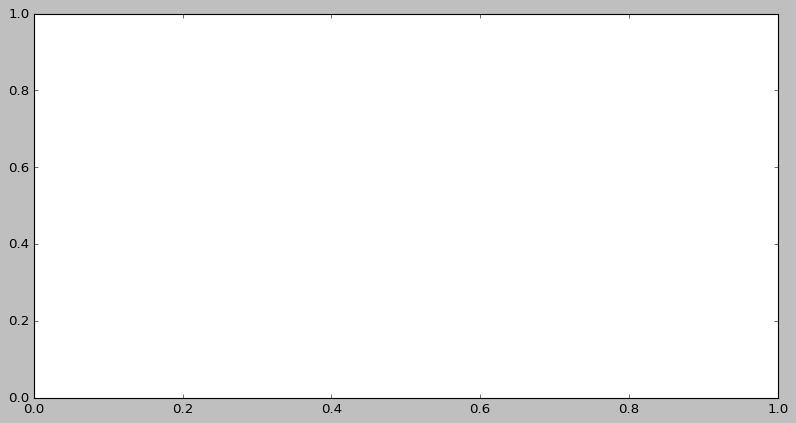

In [7]:
plt.style.use('classic')
fig, ax = plt.subplots(figsize=(12,6))

### General visualization

I first want to understand how happiness is distrubuted around the world, so I will use a histogram

<AxesSubplot:xlabel='happiness_score', ylabel='Count'>

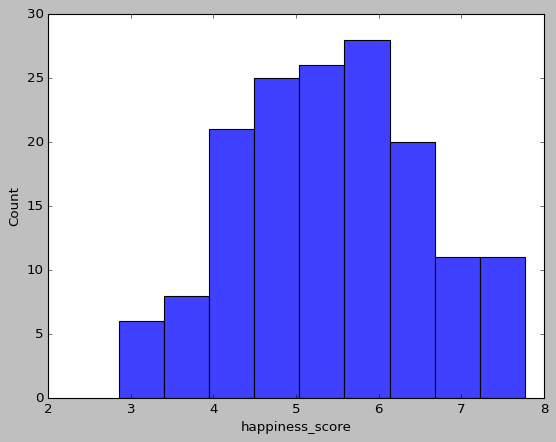

In [8]:
sns.histplot(x=data.happiness_score)

From this histogram we can see that there is a significant concentration of countries in the middle of the happiness scale but the upper tail is fatter than the lower tail, which means that overall most countries have people with average happiness but there are more countries where people are very happy than countries where citizens are very unhappy

Next I'll create various subplots to see the distribution of the rest of the data included in the original dataset

<AxesSubplot:xlabel='perceptions_of_corruption', ylabel='Count'>

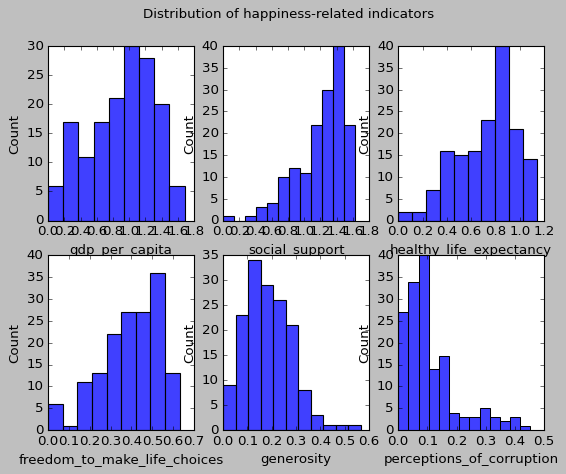

In [9]:
fig, axes = plt.subplots(2, 3)

fig.suptitle('Distribution of happiness-related indicators')

sns.histplot(ax=axes[0, 0], data=data, x='gdp_per_capita')
sns.histplot(ax=axes[0, 1], data=data, x='social_support')
sns.histplot(ax=axes[0, 2], data=data, x='healthy_life_expectancy')
sns.histplot(ax=axes[1, 0], data=data, x='freedom_to_make_life_choices')
sns.histplot(ax=axes[1, 1], data=data, x='generosity')
sns.histplot(ax=axes[1, 2], data=data, x='perceptions_of_corruption')

This subplot is interesting because in we can quickly see that some indicators are positively skewed (social support, healthy life expectancy and freedom to make choices) while others are negatively skewed (generosity and perceptions of corruption). GDP per capita is less skewed, although it seems to have a slight positive tendency.

Another interesting point is in freedom to make choices. While it is positively skewed, it is true that there is a significant number of countries with zero or almost zero for this indicator and then there is a sharp drop as soon as we look at countries with a little freedom. 

In general terms, another interesting view would be to look at the values of the top 5 countries and the bottom 5 countries to see if there are some similar patterns

In [10]:
top_5_countries = []

for i in range(5):
    top_5_countries.append(data.index[i])

In [11]:
bottom_5_countries = []

for i in range(1,6):
    bottom_5_countries.append(data.index[-i])

Text(0.5, 1.0, 'perceptions_of_corruption')

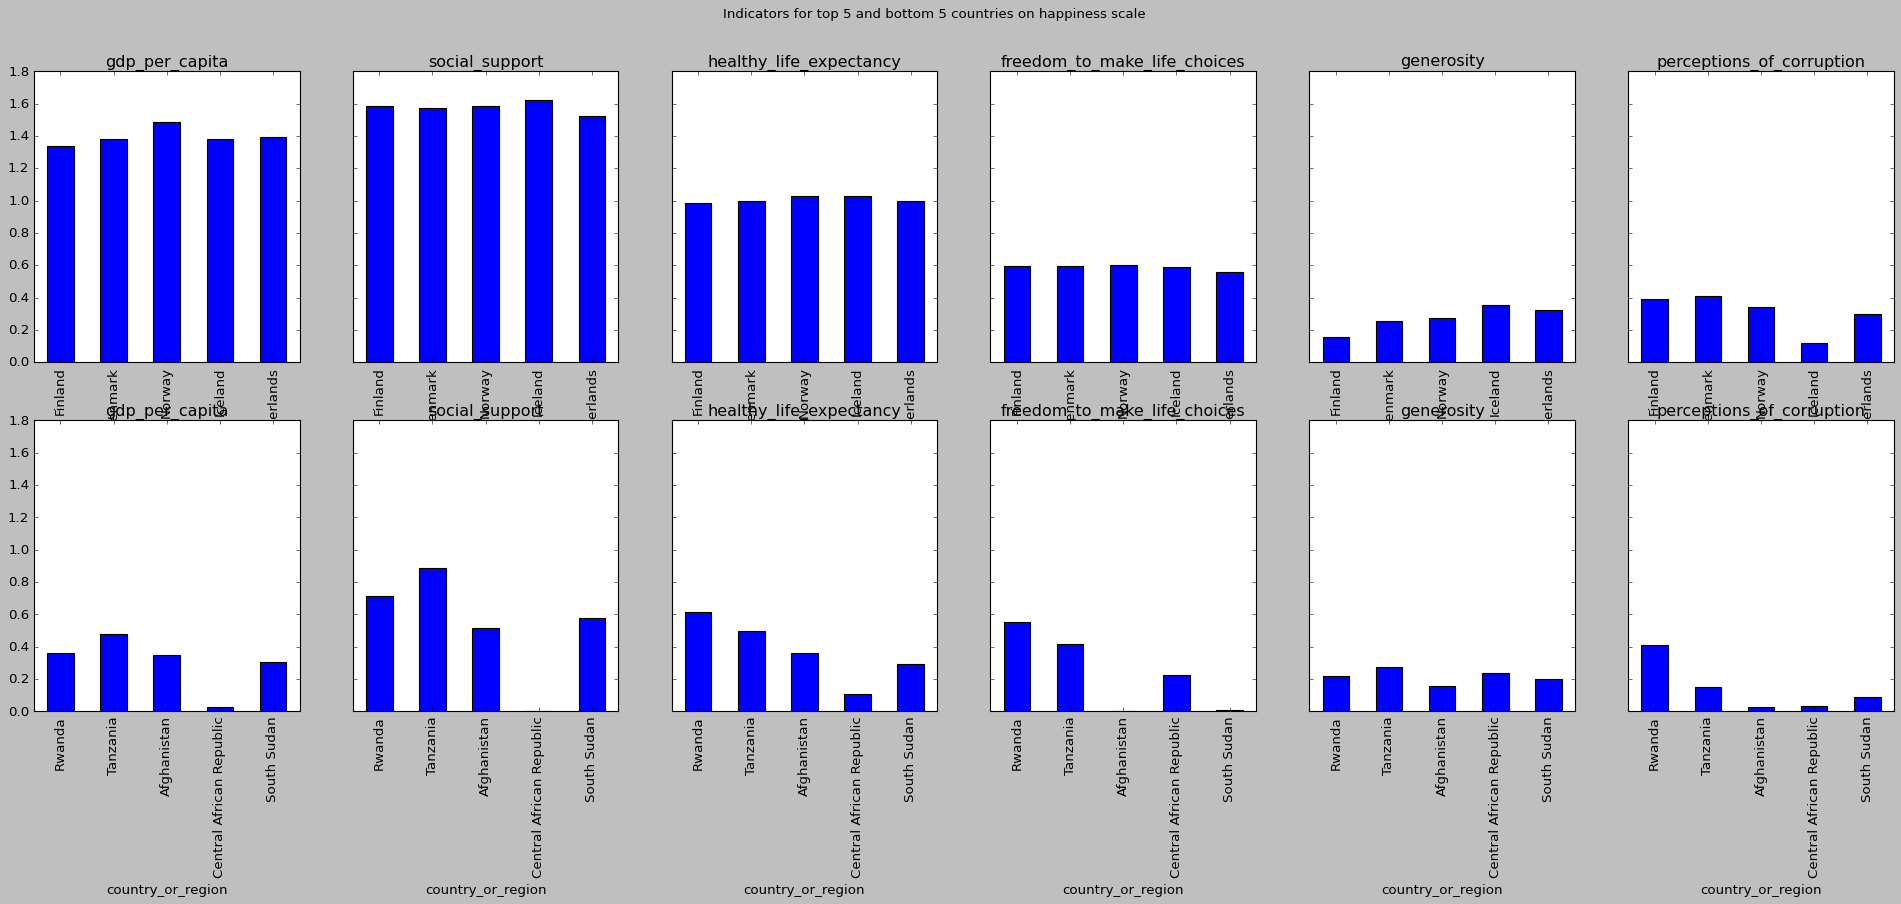

In [12]:
fig, axes = plt.subplots(2, 6, figsize=(30, 10), sharey = True)

fig.suptitle('Indicators for top 5 and bottom 5 countries on happiness scale')

data.gdp_per_capita[:5].plot(kind = 'bar', ax=axes[0, 0], tick_label=top_5_countries).set_title('gdp_per_capita')
data.social_support[:5].plot(kind = 'bar', ax=axes[0, 1], tick_label=top_5_countries).set_title('social_support')
data.healthy_life_expectancy[:5].plot(kind = 'bar', ax=axes[0, 2], tick_label=top_5_countries).set_title('healthy_life_expectancy')
data.freedom_to_make_life_choices[:5].plot(kind = 'bar', ax=axes[0, 3], tick_label=top_5_countries).set_title('freedom_to_make_life_choices')
data.generosity[:5].plot(kind = 'bar', ax=axes[0, 4], tick_label=top_5_countries).set_title('generosity')
data.perceptions_of_corruption[:5].plot(kind = 'bar', ax=axes[0, 5], tick_label=top_5_countries).set_title('perceptions_of_corruption')
data.gdp_per_capita[-5:].plot(kind = 'bar', ax=axes[1, 0], tick_label=bottom_5_countries).set_title('gdp_per_capita')
data.social_support[-5:].plot(kind = 'bar', ax=axes[1, 1], tick_label=bottom_5_countries).set_title('social_support')
data.healthy_life_expectancy[-5:].plot(kind = 'bar', ax=axes[1, 2], tick_label=bottom_5_countries).set_title('healthy_life_expectancy')
data.freedom_to_make_life_choices[-5:].plot(kind = 'bar', ax=axes[1, 3], tick_label=bottom_5_countries).set_title('freedom_to_make_life_choices')
data.generosity[-5:].plot(kind = 'bar', ax=axes[1, 4], tick_label=bottom_5_countries).set_title('generosity')
data.perceptions_of_corruption[-5:].plot(kind = 'bar', ax=axes[1, 5], tick_label=bottom_5_countries).set_title('perceptions_of_corruption')

### First hypothesis

First I will test if there is a strong correlation between happiness and monetary factors

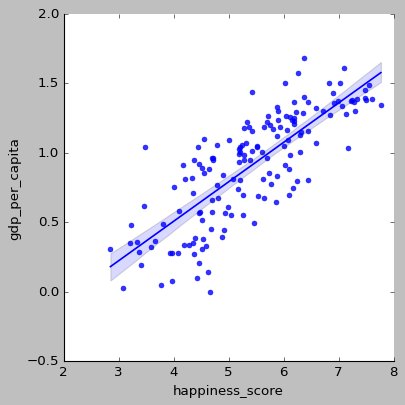

In [13]:
sns.lmplot(data=data, x='happiness_score', y='gdp_per_capita')

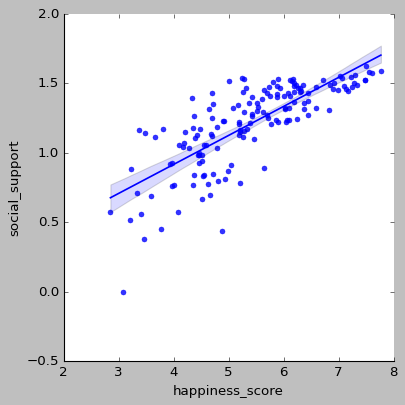

In [14]:
sns.lmplot(data=data, x='happiness_score', y='social_support')

There seems to be a positive correlation between happiness and selected monetary values (gdp per capita and social support). The stronger of the two seems to be gdp per capita

### Second hypothesis

#### Indicators included in original dataset

Next, I will explore the correlation between happiness and non-monetary indicators selected in the original dataset

<AxesSubplot:xlabel='happiness_score', ylabel='perceptions_of_corruption'>

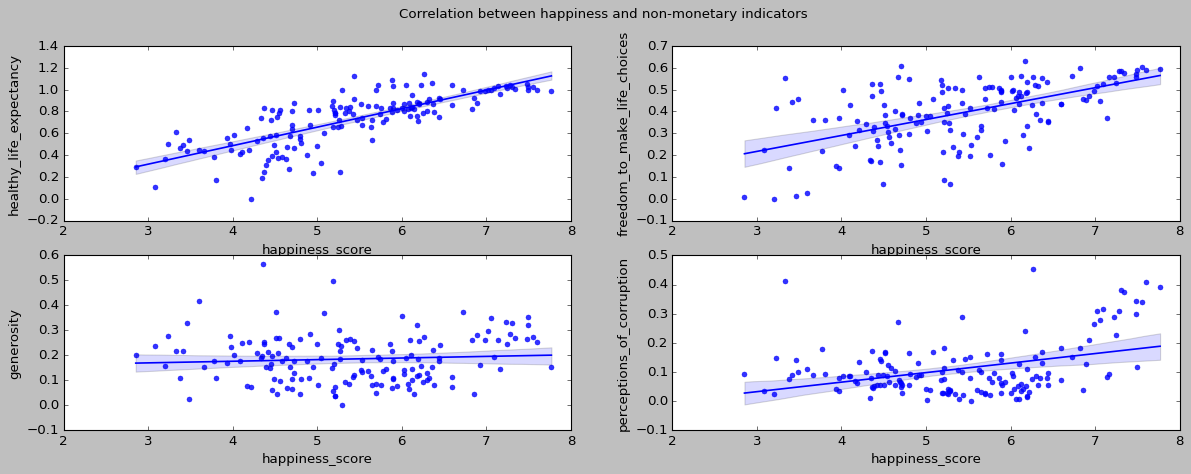

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(18, 6))

fig.suptitle('Correlation between happiness and non-monetary indicators')

sns.regplot(ax=axes[0, 0], data=data, x='happiness_score', y='healthy_life_expectancy')
sns.regplot(ax=axes[0, 1], data=data, x='happiness_score', y='freedom_to_make_life_choices')
sns.regplot(ax=axes[1, 0], data=data, x='happiness_score', y='generosity')
sns.regplot(ax=axes[1, 1], data=data, x='happiness_score', y='perceptions_of_corruption')

There seems to be some positive correlation between happiness and health, freedom and perception of corrpution but onyl health seems to show a relatively strong correlation. Generosity, on the other hand, seems to be totally uncorrelated with happiness.

#### New indicators

I will first get a general visualization of new data obtained from the API

<AxesSubplot:xlabel='fixed_broadband_subscriptions_(per_100_people)', ylabel='Count'>

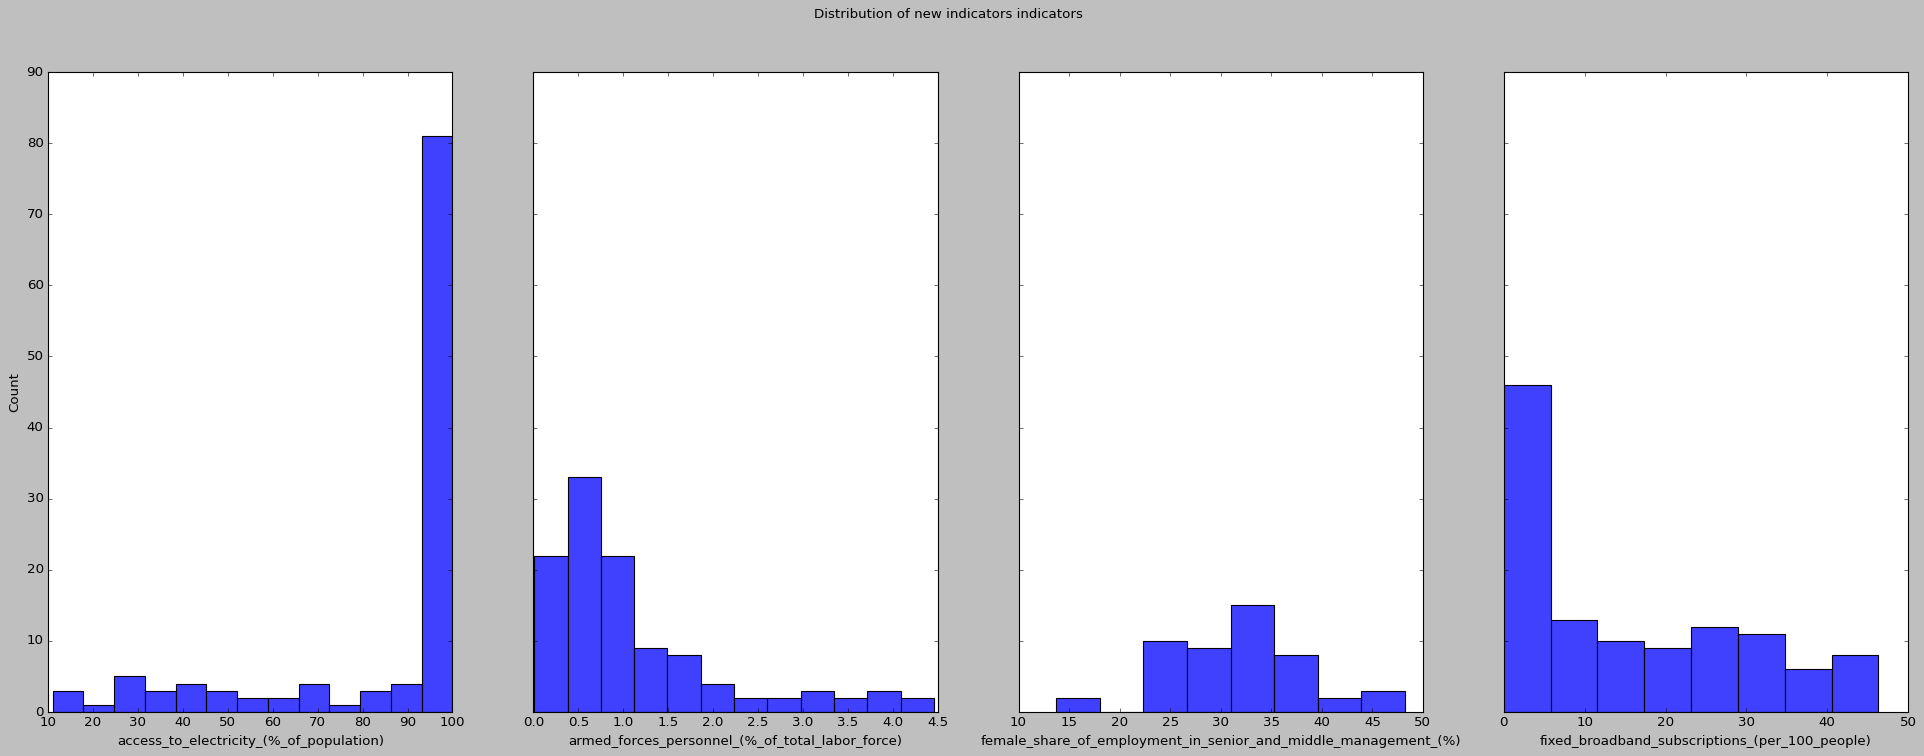

In [16]:
fig, axes = plt.subplots(1, 4, figsize=(30, 10), sharey = True)

fig.suptitle('Distribution of new indicators indicators')

sns.histplot(ax=axes[0], data=data, x='access_to_electricity_(%_of_population)')
sns.histplot(ax=axes[1], data=data, x='armed_forces_personnel_(%_of_total_labor_force)')
sns.histplot(ax=axes[2], data=data, x='female_share_of_employment_in_senior_and_middle_management_(%)')
sns.histplot(ax=axes[3], data=data, x='fixed_broadband_subscriptions_(per_100_people)')

<AxesSubplot:xlabel='total_alcohol_consumption_per_capita_(liters_of_pure_alcohol,_projected_estimates,_15+_years_of_age)', ylabel='Count'>

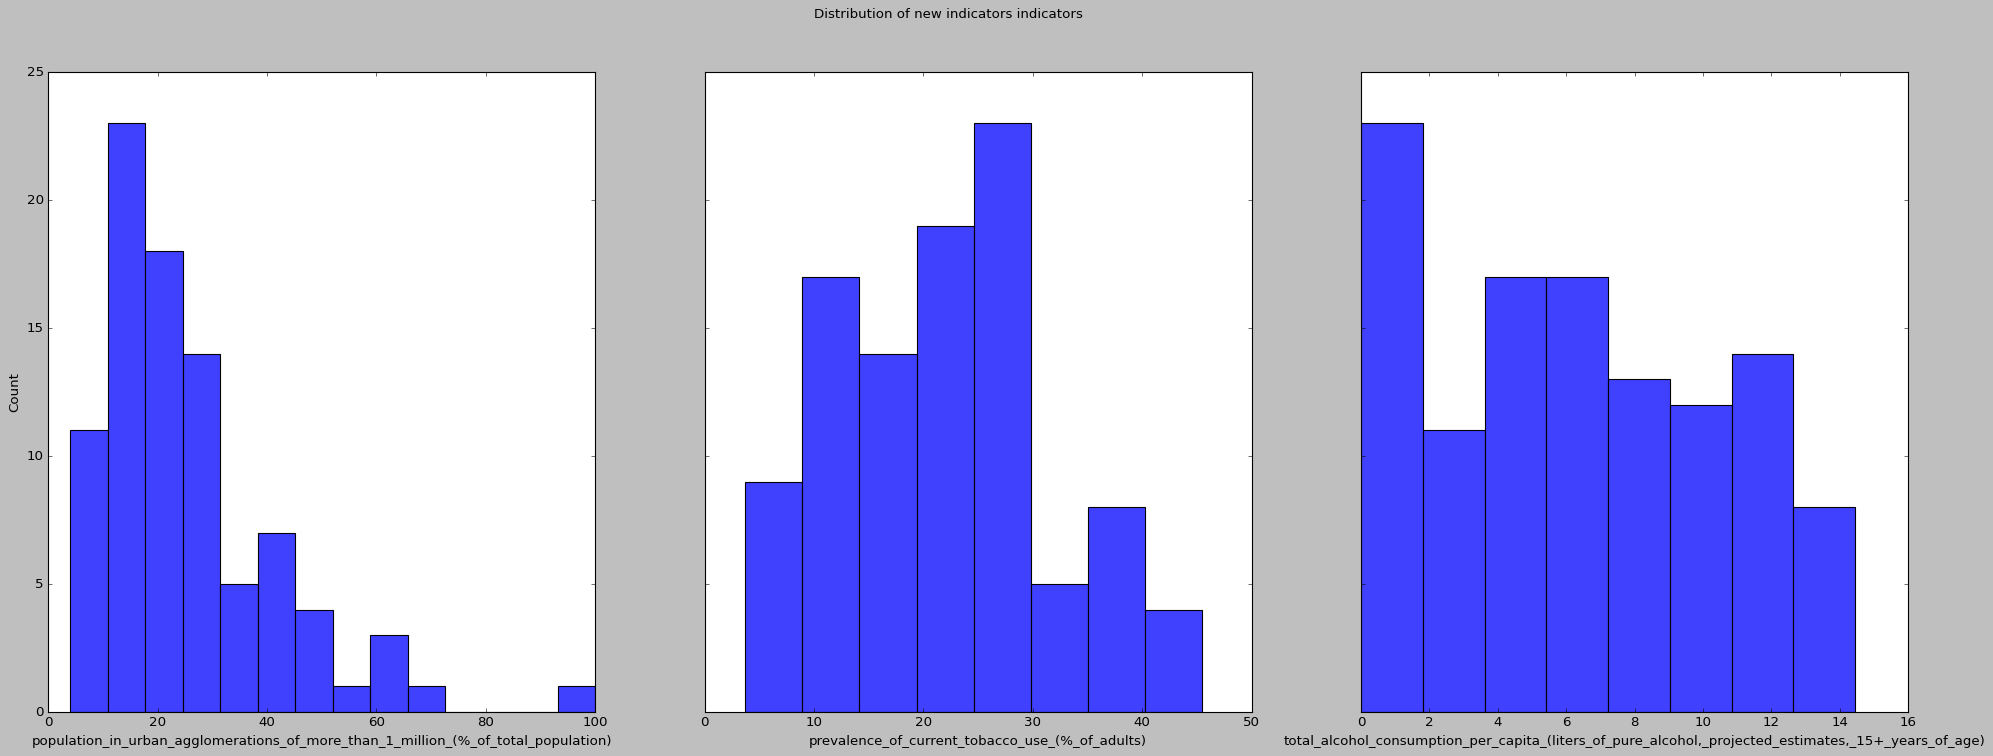

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(30, 10), sharey = True)

fig.suptitle('Distribution of new indicators indicators')

sns.histplot(ax=axes[0], data=data, x='population_in_urban_agglomerations_of_more_than_1_million_(%_of_total_population)')
sns.histplot(ax=axes[1], data=data, x='prevalence_of_current_tobacco_use_(%_of_adults)')
sns.histplot(ax=axes[2], data=data, x='total_alcohol_consumption_per_capita_(liters_of_pure_alcohol,_projected_estimates,_15+_years_of_age)')

Aside from the negative and positive skewedness that can be seen in all graphs, it seems like the access to electricity indicator is not very valuable as a variable to measure correlation, since a large percentage of the available countries have more than 90% of their population with access to electricity.

Now we can explore if there are correlations with between happiness levels and non-monetary indicators that were not included in the original dataset

Text(0, 0.5, 'alcohol consumption per capita')

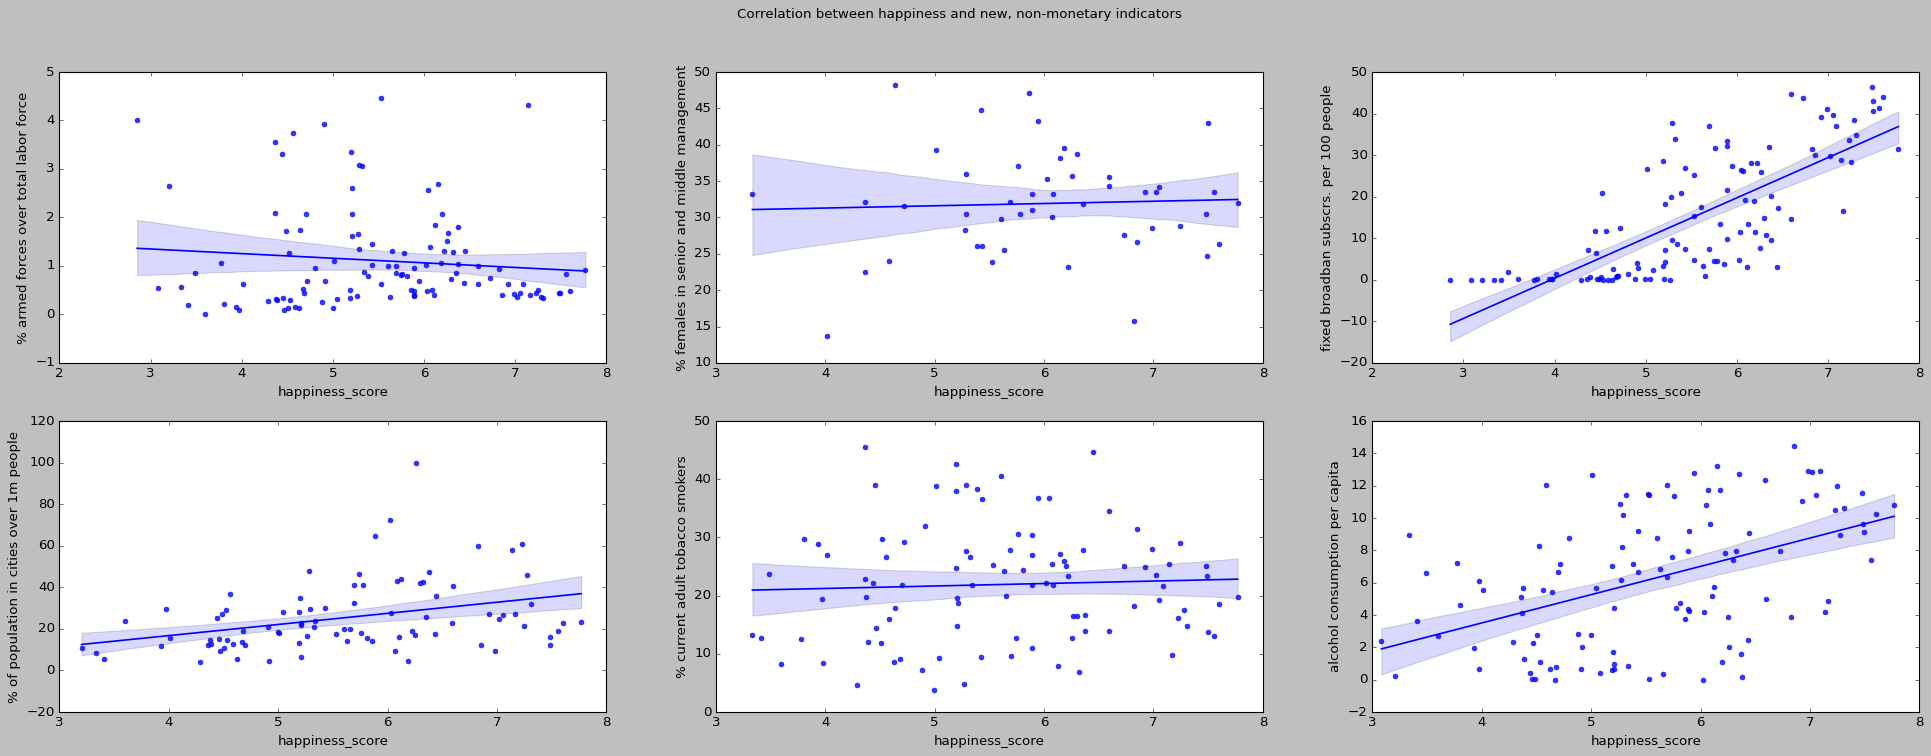

In [18]:
fig, axes = plt.subplots(2, 3, figsize=(30, 10))

fig.suptitle('Correlation between happiness and new, non-monetary indicators')

sns.regplot(ax=axes[0, 0], data=data, x='happiness_score', y='armed_forces_personnel_(%_of_total_labor_force)').set_ylabel('% armed forces over total labor force')
sns.regplot(ax=axes[0, 1], data=data, x='happiness_score', y='female_share_of_employment_in_senior_and_middle_management_(%)').set_ylabel('% females in senior and middle management')
sns.regplot(ax=axes[0, 2], data=data, x='happiness_score', y='fixed_broadband_subscriptions_(per_100_people)').set_ylabel('fixed broadban subscrs. per 100 people')
sns.regplot(ax=axes[1, 0], data=data, x='happiness_score', y='population_in_urban_agglomerations_of_more_than_1_million_(%_of_total_population)').set_ylabel('% of population in cities over 1m people')
sns.regplot(ax=axes[1, 1], data=data, x='happiness_score', y='prevalence_of_current_tobacco_use_(%_of_adults)').set_ylabel('% current adult tobacco smokers')
sns.regplot(ax=axes[1, 2], data=data, x='happiness_score', y='total_alcohol_consumption_per_capita_(liters_of_pure_alcohol,_projected_estimates,_15+_years_of_age)').set_ylabel('alcohol consumption per capita')

Again, these non-monetary indicators have mostly no / a small correlation with happiness. The number of soldiers, number of female positions in middle and senior management, urbanization and smoking don't seem to be correlated with happiness. Interestingly, the number of broadband subscriptions per 100 people and the amount of alcohol consumed per capita seem to have a correlation with happiness.

#### Overall correlations

In [19]:
data.corr()

,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,access_to_electricity_(%_of_population),armed_forces_personnel_(%_of_total_labor_force),female_share_of_employment_in_senior_and_middle_management_(%),fixed_broadband_subscriptions_(per_100_people),population_in_urban_agglomerations_of_more_than_1_million_(%_of_total_population),prevalence_of_current_tobacco_use_(%_of_adults),"total_alcohol_consumption_per_capita_(liters_of_pure_alcohol,_projected_estimates,_15+_years_of_age)"
happiness_score,1.000000,0.793883,0.777058,0.779883,0.566742,0.075824,0.385613,0.653960,-0.105808,0.044859,0.753395,0.355518,0.048361,0.468179
gdp_per_capita,0.793883,1.000000,0.754906,0.835462,0.379079,-0.079662,0.298920,0.798157,0.154706,-0.054233,0.781844,0.495119,0.291881,0.471091
social_support,0.777058,0.754906,1.000000,0.719009,0.447333,-0.048126,0.181899,0.684430,0.028033,0.272915,0.661038,0.375290,0.230964,0.501501
healthy_life_expectancy,0.779883,0.835462,0.719009,1.000000,0.390395,-0.029511,0.295283,0.800528,0.138084,-0.035717,0.798367,0.436272,0.308879,0.488258
freedom_to_make_life_choices,0.566742,0.379079,0.447333,0.390395,1.000000,0.269742,0.438843,0.307569,-0.361403,-0.025323,0.287906,0.180659,-0.162393,0.142346
generosity,0.075824,-0.079662,-0.048126,-0.029511,0.269742,1.000000,0.326538,-0.131736,-0.205361,-0.204843,-0.008092,-0.086900,-0.027708,-0.148028
perceptions_of_corruption,0.385613,0.298920,0.181899,0.295283,0.438843,0.326538,1.000000,0.051003,-0.169335,-0.107248,0.431733,0.163720,-0.136349,0.188226
access_to_electricity_(%_of_population),0.653960,0.798157,0.684430,0.800528,0.307569,-0.131736,0.051003,1.000000,0.262198,-0.027736,0.575510,0.372708,0.366365,0.302665
armed_forces_personnel_(%_of_total_labor_force),-0.105808,0.154706,0.028033,0.138084,-0.361403,-0.205361,-0.169335,0.262198,1.000000,-0.045059,0.016381,0.208197,0.289752,-0.082489
female_share_of_employment_in_senior_and_middle_management_(%),0.044859,-0.054233,0.272915,-0.035717,-0.025323,-0.204843,-0.107248,-0.027736,-0.045059,1.000000,-0.090737,-0.009444,-0.133993,0.051909


<AxesSubplot:>

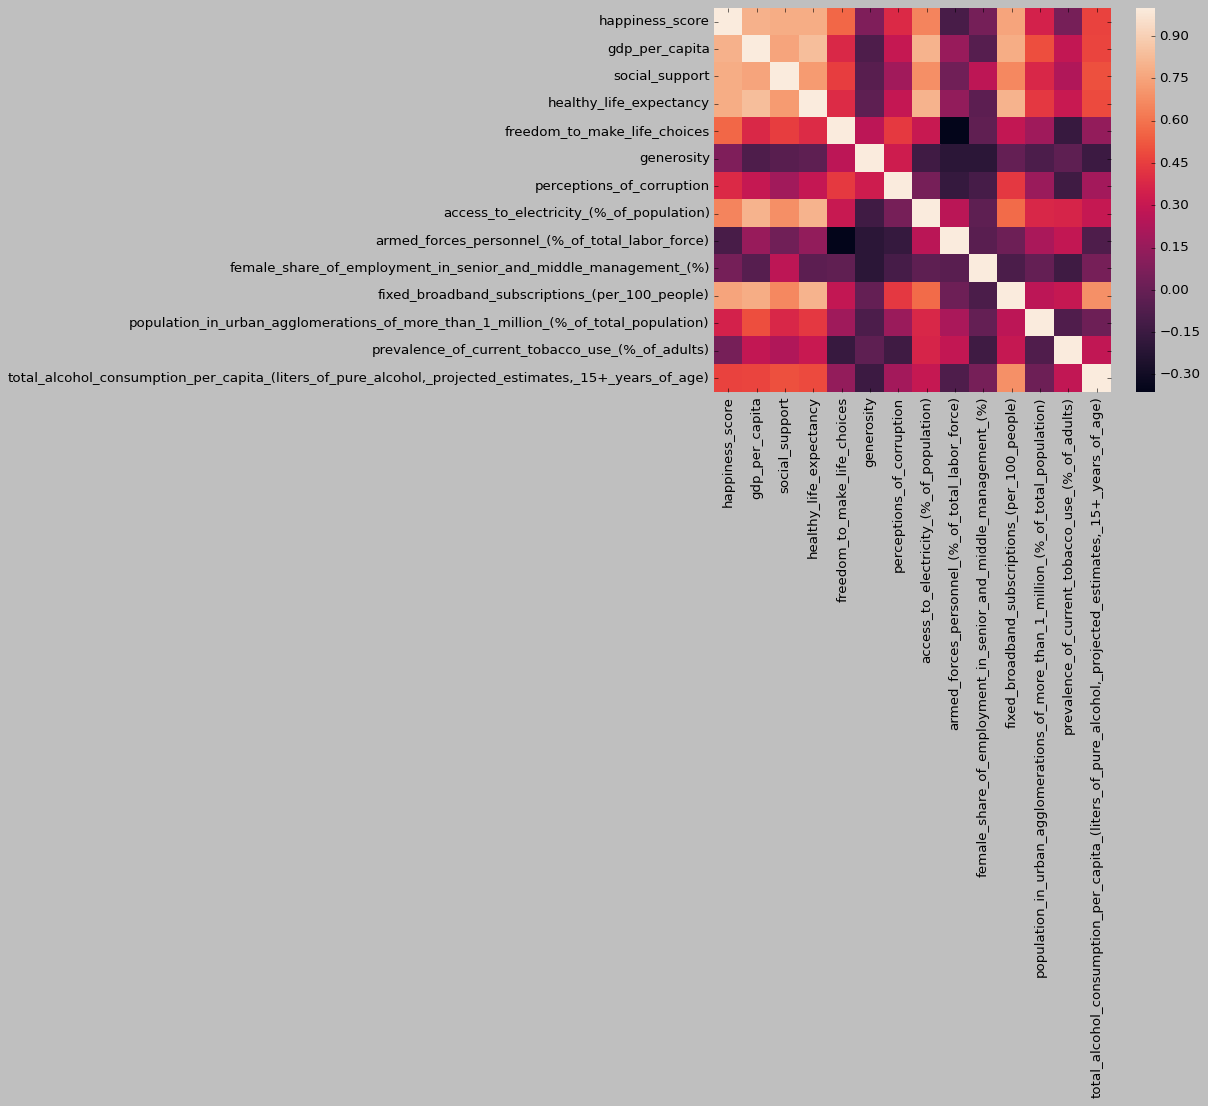

In [20]:
sns.heatmap(data.corr())

Looking at the overall correlation matrix, it is clear that the indicators that have the highest correlation  with happiness (out of the selected indicators) are GDP per capita, social support, health and, probably most surprisingly, fixed broadband subscriptions 

## Conclusions

While the first conclusion might be that my initial hypothesis was wrong, as GDP and social support are highly correlated with happiness, the correlation with fixed broadband subscriptions offers a valuable conclusion. Since it is very unlikely that having more broadband connections has a causal link with happiness, it is important to highlight that correlation doesn't imply causation, and that we might find very unlikely correlations if we look at a sufficiently large number of indicators but the link might be caused by pure chance 